<a href="https://colab.research.google.com/github/Tawn-Scotton/deep-learning-challenge/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Preprocessing

In [31]:
#Checking application__df for null/na values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [32]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'],axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [33]:
from IPython.core import application
# Determine the number of unique values in each column.
for i in application_df.columns:
  print(i, len(application_df[i].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [34]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [35]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts<500].index)
application_cutoffs = 500
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [36]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [37]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x: x >1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [38]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#\
classifications_to_replace = list(classification_counts[classification_counts<1000].index)
classification_cutoff = 1000
for cls in classifications_to_replace:
   application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")




# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [39]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies_df=pd.get_dummies(application_df)
application_dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
# Split our preprocessed data into our features and target arrays
X = application_dummies_df.drop('IS_SUCCESSFUL', axis=1).values
X


array([[       1,     5000,        0, ...,        0,        1,        0],
       [       1,   108590,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       ...,
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1, 36500179,        0, ...,        0,        1,        0]])

In [41]:
y = application_dummies_df['IS_SUCCESSFUL']
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [42]:
y = application_dummies_df['IS_SUCCESSFUL']
y
# Split the preprocessed data into a training and testing dataset
X_train ,X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
X_train_scaled.shape


(25724, 43)

## Compile, Train and Evaluate the Model

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
hidden_node1 = 60
hidden_node2 = 30
hidden_node3=20
nn_model_1 = tf.keras.models.Sequential()

# First hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))
#Second_hidden_layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))
#3RD_hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))
# Output layer
nn_model_1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Check the structure of the model
nn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 60)                2640      
                                                                 
 dense_9 (Dense)             (None, 30)                1830      
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,111
Trainable params: 5,111
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
from keras.callbacks import ModelCheckpoint
# Train the model


checkpoint_path= 'model_weights.h5'
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                              verbose=1,
                              save_weight_only=True,
                              save_freq='epoch',
                              period=5)

In [48]:
# Train the model
fit_model_1 = nn_model_1.fit(X_train_scaled, y_train, epochs=50,callbacks=[checkpoint_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5708 - accuracy: 0.7213
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7286
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7297
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7307
Epoch 5/50
791/804 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7311
Epoch 5: saving model to model_weights.h5
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7312
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7325
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7314
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.7329
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss:

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.7275 - 431ms/epoch - 2ms/step
Loss: 0.558965802192688, Accuracy: 0.7274635434150696


<Axes: >

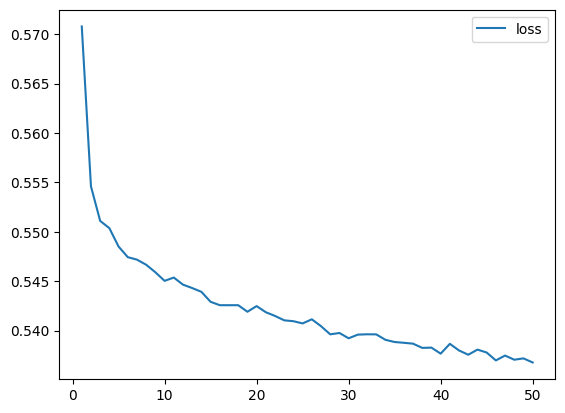

In [50]:
#Create a dataframe containing training history of the first  model
history_df=pd.DataFrame(fit_model_1.history)
#Increase index by 1 to match the number of epochs
history_df.index +=1
history_df.plot(y='loss')
#plot the accuracy='accuracy')

In [51]:
# Export our model
export_path = 'nn_model_1.h5'
nn_model_1.save('../h5_files/AlphabetSoupCharity_model_1.h5')

In [59]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2 is 86 so chose 80 for the first hidden node
hidden_node1 = 80
hidden_node2 = 40
# Add a third hidden layer
hidden_node3 = 20
#Add a fourth hidden layer
hidden_node4 = 10
nn_model_2 = tf.keras.models.Sequential()

# First hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1, activation='tanh', input_dim=input_features,))

# Second hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2, activation='tanh'))

# Third hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3, activation='tanh'))
# Fourth hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node4, activation='tanh'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                3520      
                                                                 
 dense_21 (Dense)            (None, 40)                3240      
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the  2nd model
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Train the 2nd model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=50,callbacks=[checkpoint_callback])

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5669 - accuracy: 0.7236
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7297
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5500 - accuracy: 0.7307
Epoch 5/50
792/804 [============================>.] - ETA: 0s - loss: 0.5481 - accuracy: 0.7323
Epoch 5: saving model to model_weights.h5
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7317
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7311
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7336
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7329
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss:

In [62]:
# Evaluate the 2nd model using the test data
model_loss, model_accuracy = nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 1s - loss: 0.5579 - accuracy: 0.7278 - 549ms/epoch - 2ms/step
Loss: 0.5578619241714478, Accuracy: 0.7278134226799011


<Axes: >

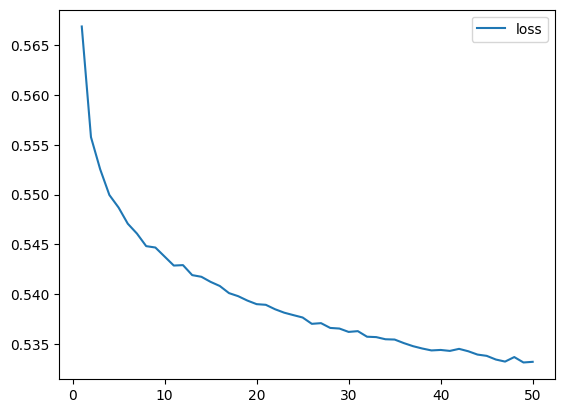

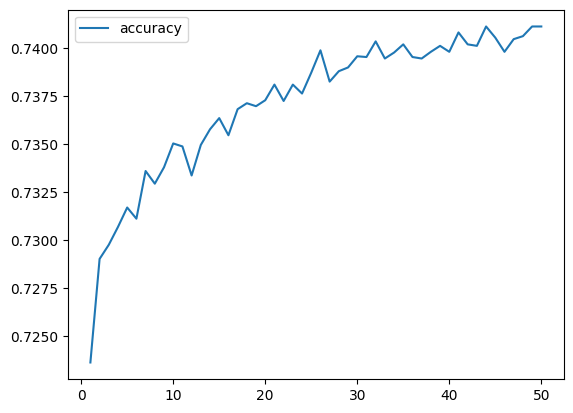

In [63]:
# Create a DataFrame containing training history of the 2nd model
history_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [64]:
# Export our model
export_path = 'nn_model_2.h5'
nn_model_1.save('../h5_files/AlphabetSoupCharity_model_2.h5')